In [10]:
from pipeline import LBP_3D
import os
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report,roc_auc_score



In [11]:

def XGBoost(X_tr, Y_tr, X_te, Y_te,quick=False):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
    }

    # Create the model
    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        tree_method='hist',
        random_state=42
    )

    if quick:
            best_model = xgb_model
            best_model.fit(X_tr, Y_tr)

            xgb_pred = best_model.predict(X_te)


            ConfusionMatrixDisplay.from_estimator(estimator=best_model, X=X_te, y=Y_te)

            print("Classification Report: XGBoost",roc_auc_score(Y_te,xgb_pred))
            report = classification_report(Y_te, xgb_pred, digits=2)
            print(report)
            return best_model


    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        scoring='accuracy',  
        cv=10,  
        verbose=1,
        n_jobs=-1  
    )

  
    grid_search.fit(X_tr, Y_tr)

   
    best_model = grid_search.best_estimator_
    best_model.fit(X_tr, Y_tr)

    xgb_pred = best_model.predict(X_te)

    ConfusionMatrixDisplay.from_estimator(estimator=best_model, X=X_te, y=Y_te)

    print("Classification Report: XGBoost",roc_auc_score(Y_te,xgb_pred))
    report = classification_report(Y_te, xgb_pred, digits=2)
    print(report)
    return best_model
def RF(X_tr, Y_tr, X_te, Y_te):

    param_grid = {
        'n_estimators': [int(x) for x in np.linspace(start=10, stop=100, num=10)],  
        'max_depth': range(1, 20),  
        'criterion': ['gini', 'entropy'] 
    }


    optimal_params = GridSearchCV(
        estimator=RandomForestClassifier(random_state=42),
        param_grid=param_grid,
        cv=10, 
        scoring='accuracy',
        verbose=0,
        n_jobs=-1
    )


    optimal_params.fit(X_tr, Y_tr)
    print("Best parameters found: ", optimal_params.best_params_)


    criterion = optimal_params.best_params_['criterion']
    max_depth = optimal_params.best_params_['max_depth']
    n_estimators = optimal_params.best_params_['n_estimators']


    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        criterion=criterion,
        random_state=42
    )

    rf_model.fit(X_tr, Y_tr)


    rf_pred = rf_model.predict(X_te)


    ConfusionMatrixDisplay.from_estimator(estimator=rf_model, X=X_te, y=Y_te)

    print("Best Cross-Validation Score:",optimal_params.best_score_)
    print("Classification Report: Random Forest")
    print(classification_report(Y_te, rf_pred, digits=2),roc_auc_score(Y_te,rf_pred))
    return rf_model


In [12]:


csv_dir = '../Datasets/Mouse B-ENaC Study/csv/'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

data=[]
for d,p in dataframes:
    name=p.split('_XV')[0]+'_XV'
    name=name.split('/')[-1]
    d.columns=['SV','X','Y','Z']
    if 'wt' in p:
        
        data.append([d,0])
    else:
        data.append([d,1])


lbp=LBP_3D(data)
features=lbp.extract()

In [13]:
features

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Label
0,0.008387,0.016374,0.009185,0.001198,0.018371,0.035543,0.012780,0.004393,0.005990,0.012780,...,0.006789,0.001997,0.007987,0.016374,0.005990,0.001597,0.006789,0.005990,0.003594,0
1,0.008155,0.016650,0.005776,0.001359,0.012572,0.037717,0.012912,0.007475,0.007136,0.017669,...,0.005776,0.002379,0.012572,0.009514,0.005437,0.001359,0.003738,0.004417,0.004757,1
2,0.007914,0.013966,0.007449,0.001397,0.015363,0.049348,0.017691,0.007449,0.008380,0.010242,...,0.005121,0.004655,0.009311,0.022812,0.006052,0.001397,0.003259,0.008845,0.004655,0
3,0.006597,0.015134,0.005821,0.001164,0.010865,0.042685,0.017074,0.004269,0.007373,0.010477,...,0.004269,0.005821,0.008149,0.017462,0.005433,0.001940,0.004269,0.005821,0.008537,0
4,0.007355,0.014709,0.008066,0.002372,0.009727,0.040569,0.012811,0.005457,0.009727,0.010202,...,0.005457,0.005457,0.011388,0.013049,0.005931,0.000474,0.007355,0.004745,0.004033,1
5,0.005904,0.010445,0.003633,0.001362,0.006812,0.028610,0.009083,0.006358,0.007266,0.008629,...,0.007266,0.004995,0.008629,0.019074,0.004995,0.001362,0.004541,0.007720,0.006812,0
6,0.010465,0.020622,0.004925,0.002462,0.013850,0.045552,0.015389,0.007079,0.007387,0.016313,...,0.007387,0.003693,0.012927,0.013235,0.004925,0.001539,0.005232,0.005848,0.004617,1
7,0.010795,0.020871,0.007557,0.000720,0.020871,0.047499,0.015833,0.007917,0.005757,0.012594,...,0.007917,0.002519,0.007197,0.010076,0.006837,0.001080,0.005398,0.003239,0.005757,0
8,0.011305,0.016193,0.007027,0.002444,0.010999,0.043691,0.019248,0.006111,0.006111,0.017110,...,0.006722,0.003972,0.017110,0.010694,0.006416,0.002139,0.003972,0.002750,0.004583,1
9,0.008624,0.014374,0.006982,0.000821,0.014990,0.047228,0.012526,0.005749,0.008214,0.013758,...,0.006366,0.003696,0.012731,0.009035,0.006366,0.001232,0.007187,0.004107,0.005339,1


In [14]:
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')

features.fillna(0,inplace=True)

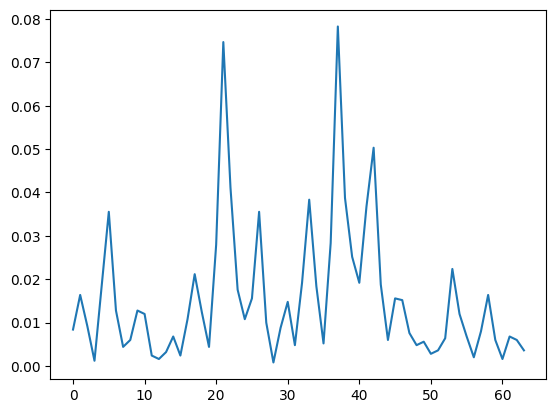

In [15]:
plt.plot(features.T[0])

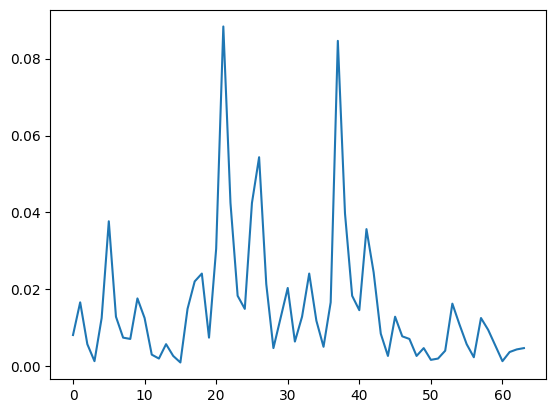

In [16]:
plt.plot(features.T[1])

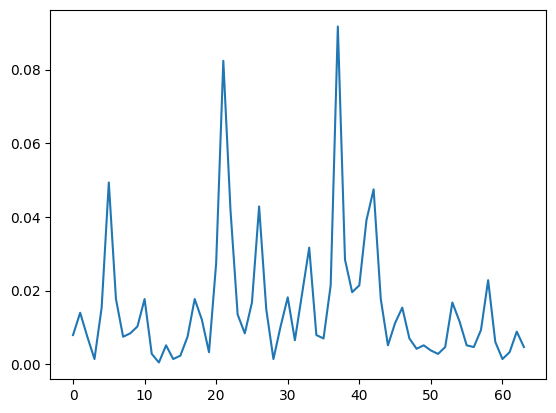

In [17]:
plt.plot(features.T[2])

Classification Report: XGBoost 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



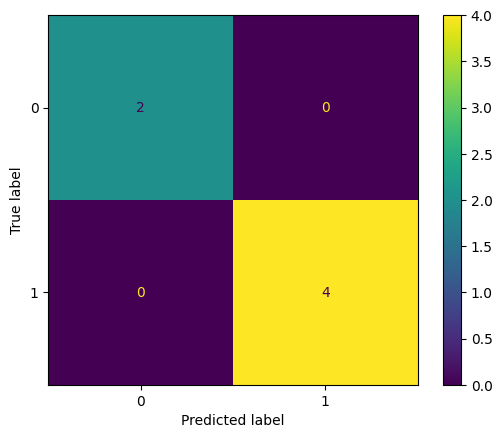

In [18]:

X_train, X_test, y_train, y_test = train_test_split(features.values, labels, test_size=0.2, random_state=42)

modelLBP=XGBoost(X_train,y_train,X_test,y_test,True)